# **Titanic EDA Project**


Author: Komal Sakhidad  
<div style="display: flex; gap: 15px; align-items: center;">

<!-- LinkedIn -->
<a href="https://www.linkedin.com/in/komalbaloch" target="_blank">
  <img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="35" title="LinkedIn"/>
</a>

<!-- GitHub -->
<a href="https://github.com/KomalBaloch" target="_blank">
  <img src="https://cdn-icons-png.flaticon.com/512/25/25231.png" width="35" title="GitHub"/>
</a>

<!-- Portfolio -->
<a href="https://komalbaloch.github.io/portfolio/" target="_blank">
  <img src="https://cdn-icons-png.flaticon.com/512/841/841364.png" width="35" title="Portfolio"/>
</a>

<!-- Kaggle -->
<a href="https://www.kaggle.com/KomalBaloch" target="_blank">
  <img src="https://cdn-icons-png.flaticon.com/512/880/880650.png" width="35" title="Kaggle"/>
</a>

</div>

---

## **Metadata**
- Project: EDA on Titanic Dataset
- Dataset: Titanic (Seaborn Built-in)
- Tools: Python, Jupyter Notebook, Pandas, NumPy, Matplotlib, Seaborn, Plotly, ydata_profiling
- Skills Covered: Data Cleaning, EDA, Feature Engineering, Visualization, Normalization, Standardization

![AI Generated Titanic](picture.jpeg)

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import ydata_profiling
%matplotlib inline
sns.set_style('whitegrid')

## **Load Titanic Dataset & Save to CSV**

In [198]:
# Load dataset from seaborn
df = sns.load_dataset('titanic')

# Save as CSV in the current folder
df.to_csv('titanic.csv', index=False)

import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings


## **Load Titanic Dataset from CSV**


In [199]:
# Load the CSV file (now using saved CSV)
df = pd.read_csv('titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **Dataset Overview**

In [200]:
# Check the shape of the dataset
print("Dataset shape:", df.shape)

# Check first 5 rows
df.head()

Dataset shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **Dataset Info**

In [201]:
# Check column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## **Summary Statistics**

### **Check Missing Values**

In [202]:
# Count of missing values per column
missing = df.isnull().sum()
missing[missing > 0]  # Show only columns with missing values

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

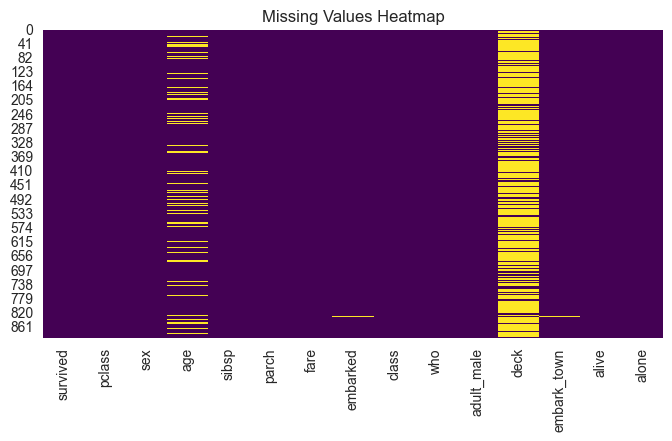

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### **Handling Missing Values**

Handling strategy:
- 'age'         → fill with median
- 'embarked'    → fill with mode (most frequent port)
- 'embark_town' → fill with mode
- 'deck'        → fill with 'Unknown' category

In [204]:
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['deck'] = df['deck'].fillna('Unknown')

# Check missing values after handling
missing_after = df.isnull().sum()
print("Missing values after handling:")
print(missing_after[missing_after > 0])

Missing values after handling:
Series([], dtype: int64)


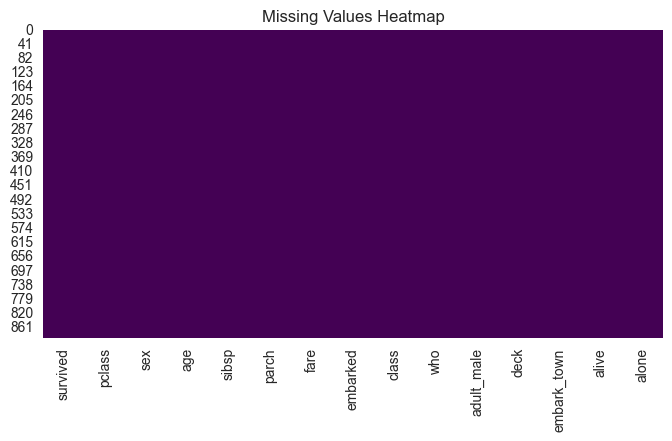

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

## **Visualize Numerical Features**

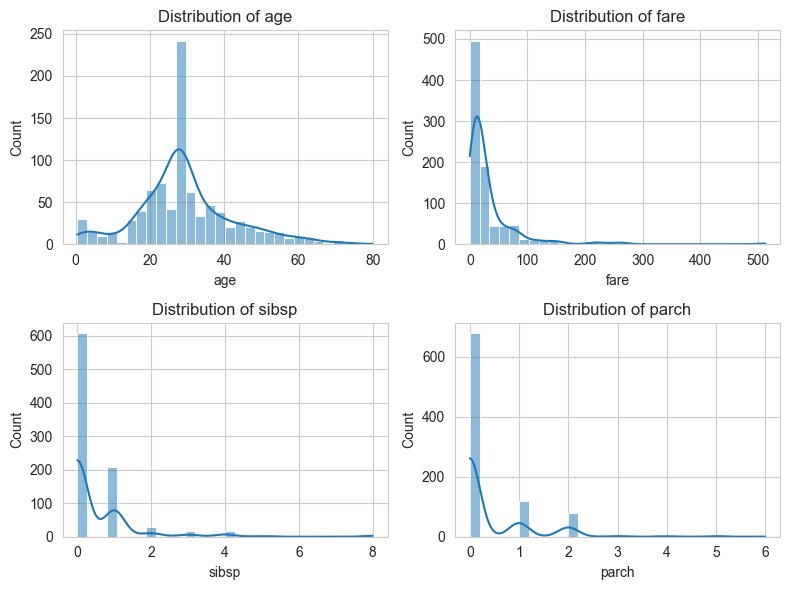

In [206]:
num_cols = ['age', 'fare', 'sibsp', 'parch']

plt.figure(figsize=(8,6))
for i, col in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## **Visualize Categorical Features**

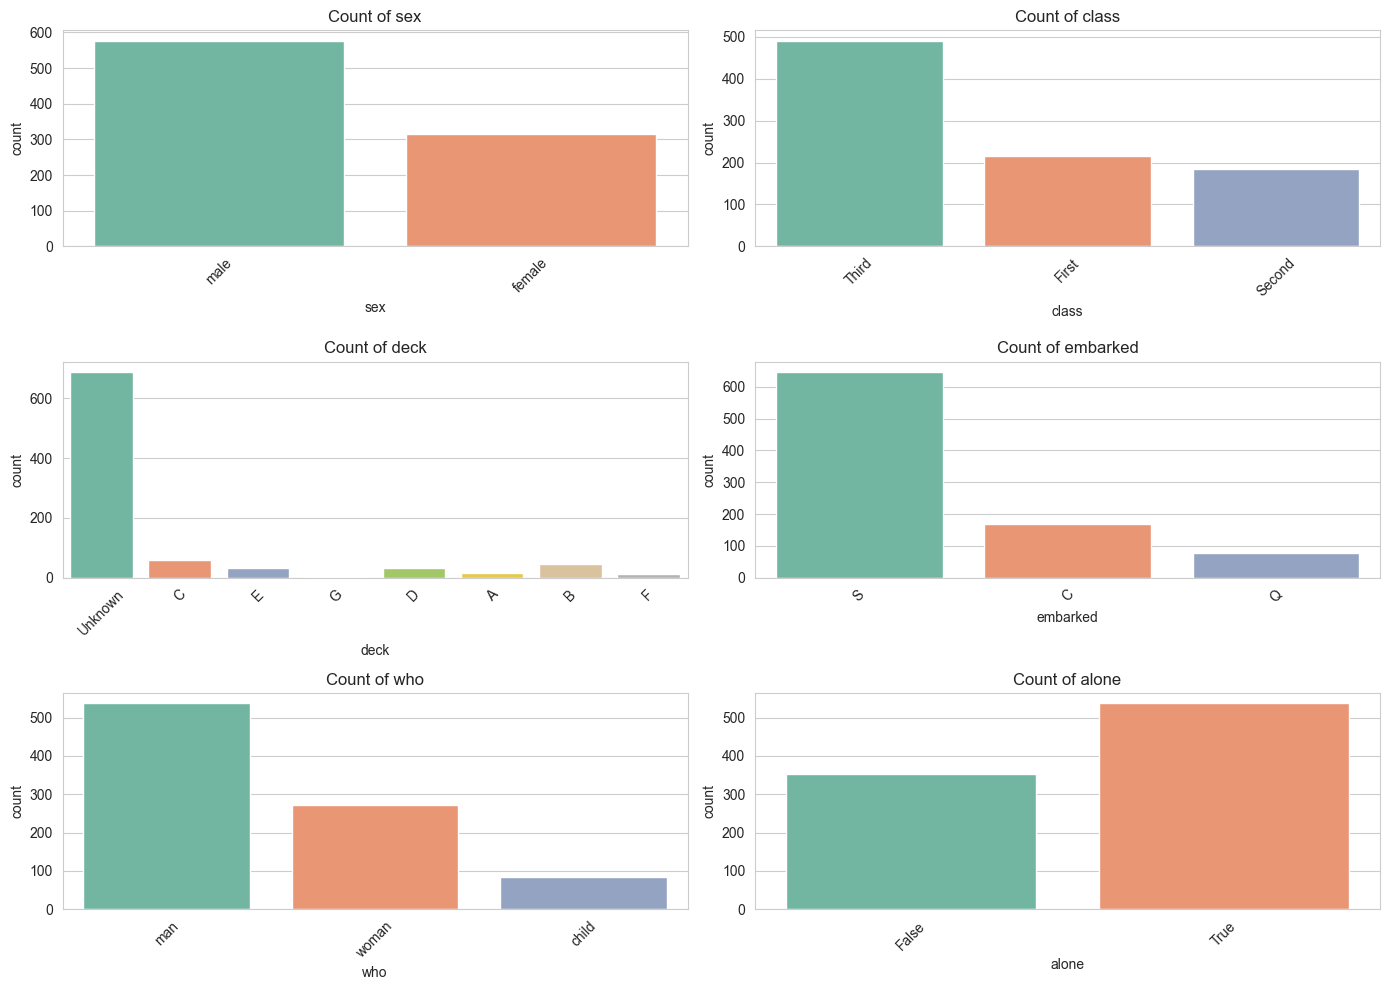

In [207]:
cat_cols = ['sex', 'class', 'deck', 'embarked', 'who', 'alone']

plt.figure(figsize=(14,10))
for i, col in enumerate(cat_cols):
    plt.subplot(3,2,i+1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Survival Analysis by Category**

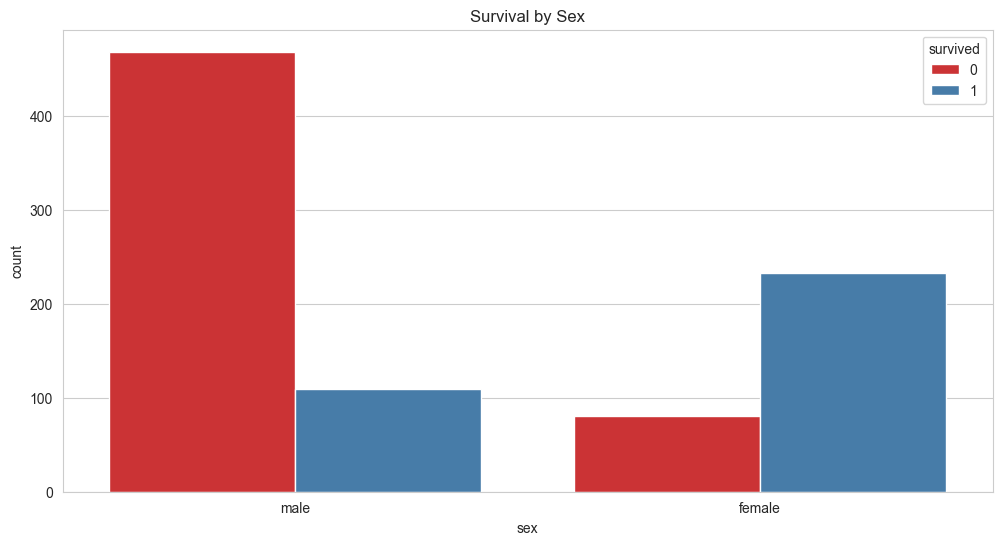

In [208]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='sex', hue='survived', palette='Set1')
plt.title('Survival by Sex')
plt.show()

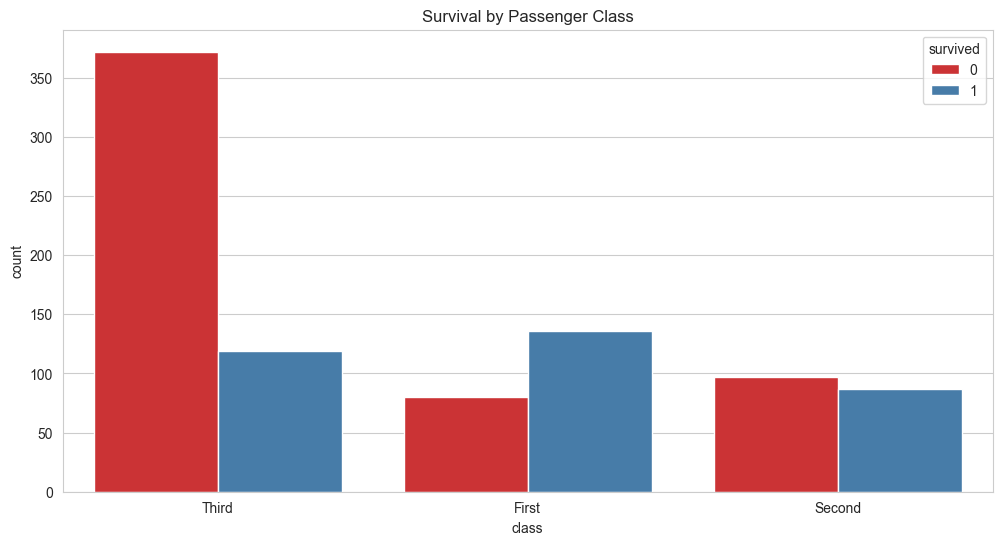

In [209]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='class', hue='survived', palette='Set1')
plt.title('Survival by Passenger Class')
plt.show()

## **Correlation Heatmap**

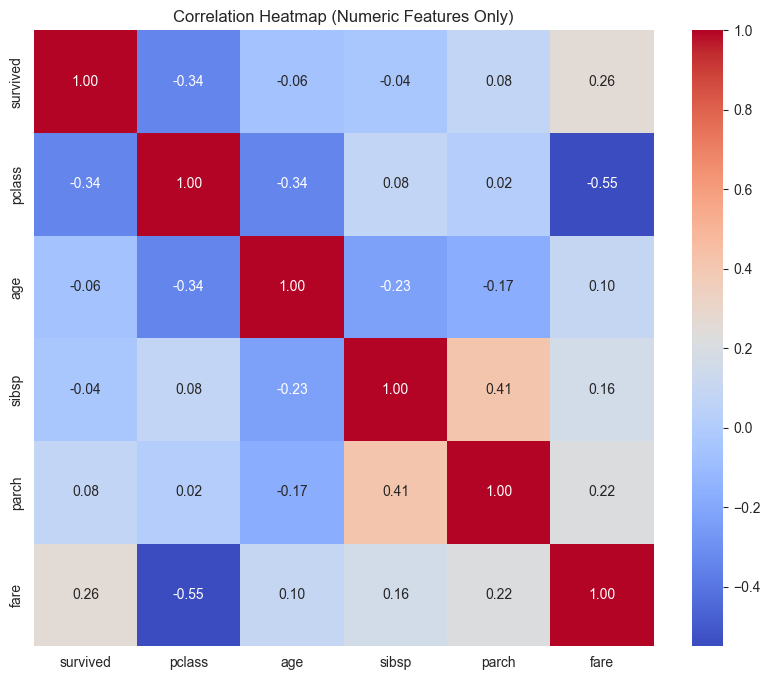

In [210]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()


## **Check duplicates**

In [211]:
df.duplicated().sum()

110

## **Handle duplicates**

In [212]:
df = df.drop_duplicates()
df.duplicated().sum()

0

## **Check Outliers**

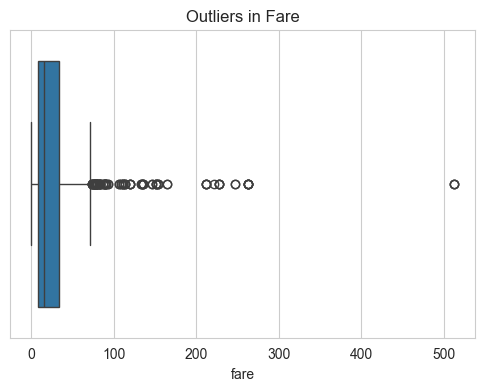

In [213]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['fare'])
plt.title("Outliers in Fare")
plt.show()


In [214]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]
outliers.shape

(102, 15)

In [215]:
df['fare_log'] = np.log1p(df['fare'])

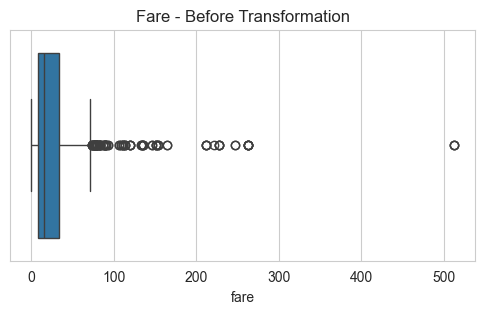

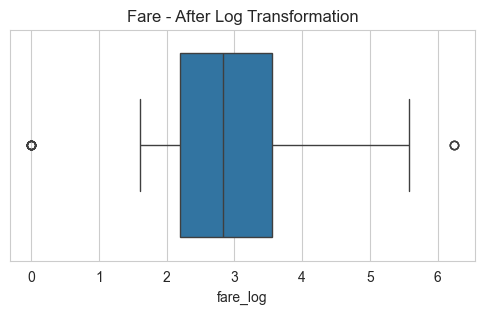

In [216]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['fare'])
plt.title("Fare - Before Transformation")
plt.show()

plt.figure(figsize=(6,3))
sns.boxplot(x=df['fare_log'])
plt.title("Fare - After Log Transformation")
plt.show()

## **Encoding**

In [217]:
df.select_dtypes(include='object').columns

Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')

In [218]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,fare_log,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,Third,man,True,Unknown,Southampton,no,False,2.110213,False,True
1,1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,4.280593,False,False
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,Unknown,Southampton,yes,True,2.188856,False,True
3,1,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,3.990834,False,True
4,0,3,0,35.0,0,0,8.0500,Third,man,True,Unknown,Southampton,no,True,2.202765,False,True


In [219]:
df.shape

(781, 17)

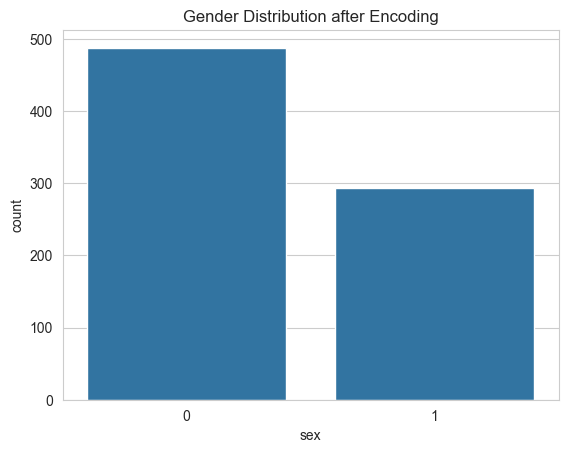

In [220]:
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution after Encoding')
plt.show()

## **Y-data Profiling**

In [221]:
from ydata_profiling import ProfileReport
# Create profile report
profile = ProfileReport(df, title="Titanic Dataset Profiling Report", explorative=True)
# Save report as HTML
profile.to_file("titanic_EDA_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [222]:
df.to_csv('titanic_updated.csv', index=False)

print("Updated dataset saved as 'titanic_updated.csv'. Original 'titanic.csv' remains unchanged.")

Updated dataset saved as 'titanic_updated.csv'. Original 'titanic.csv' remains unchanged.
